In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Accessing the Final Project folder 
%cd '/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4'

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4


In [3]:
% cd hiivemdptoolbox/

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4/hiivemdptoolbox


In [4]:
import hiive.mdptoolbox.example

In [5]:
P_small, R_small = hiive.mdptoolbox.example.forest(S = 20, p = 0.2)

In [6]:
P_small.shape

(2, 20, 20)

In [7]:
R_small.shape

(20, 2)

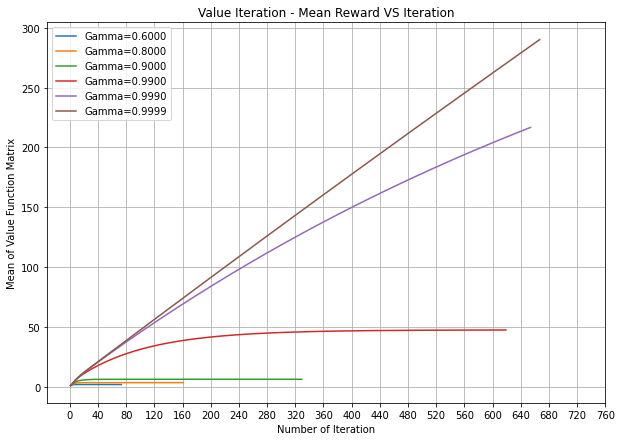

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,7))
plt.grid()
Gamma = [0.6, 0.8, 0.9, 0.99, 0.999, 0.9999]


for g in Gamma:
  vi_forest_small = hiive.mdptoolbox.mdp.ValueIteration(P_small, R_small, gamma= g, epsilon= 1e-60, max_iter=2000)
  vi_forest_small.run()
  df = pd.DataFrame(vi_forest_small.run_stats)
  plt.plot(df['Iteration'], df['Mean V'], label= 'Gamma={:.4f}'.format(g))


plt.legend(loc= 'best')
plt.xticks(range(0,800, 40))
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Value Iteration - Mean Reward VS Iteration')
plt.show()

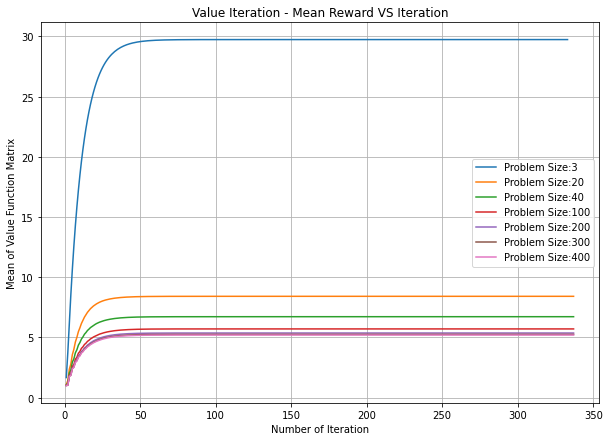

In [9]:
# Exploring the problem size effect on Number of needed iteration and mean reward

figure(figsize=(10,7))
problem_size = [3, 20, 40, 100, 200, 300, 400]

for p_size in problem_size:
  P_custom, R_custom = hiive.mdptoolbox.example.forest(S = p_size)
  vi_forest_custom = hiive.mdptoolbox.mdp.ValueIteration(P_custom, R_custom, gamma = 0.9, epsilon = 1e-60)
  vi_forest_custom.run()
  df_custom = pd.DataFrame(vi_forest_custom.run_stats)
  plt.plot(df_custom['Iteration'], df_custom['Mean V'], label= 'Problem Size:{}'.format(p_size))

plt.legend(loc= 'best')
# plt.xticks(range(0,400, 20))
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Value Iteration - Mean Reward VS Iteration')
plt.grid()
plt.show()

In [10]:
#optimal Value Itearation

vi_forest_small_optimal = hiive.mdptoolbox.mdp.ValueIteration(P_small, R_small, gamma= 0.99, epsilon= 1e-60)
vi_forest_small_optimal.run()

[{'Action': None,
  'Error': 4.0,
  'Iteration': 1,
  'Max V': 4.0,
  'Mean V': 1.1,
  'Reward': 4.0,
  'State': None,
  'Time': 7.128715515136719e-05},
 {'Action': None,
  'Error': 3.168,
  'Iteration': 2,
  'Max V': 7.168,
  'Mean V': 1.4064,
  'Reward': 7.168,
  'State': None,
  'Time': 0.00019884109497070312},
 {'Action': None,
  'Error': 2.665872000000001,
  'Iteration': 3,
  'Max V': 9.833872000000001,
  'Mean V': 2.3913855999999996,
  'Reward': 9.833872000000001,
  'State': None,
  'Time': 0.000301361083984375},
 {'Action': None,
  'Error': 2.1424201920000003,
  'Iteration': 4,
  'Max V': 11.976292192,
  'Mean V': 2.8875443648000005,
  'Reward': 11.976292192,
  'State': None,
  'Time': 0.0003921985626220703},
 {'Action': None,
  'Error': 1.825900895808001,
  'Iteration': 5,
  'Max V': 13.802193087808002,
  'Mean V': 3.7494679526528003,
  'Reward': 13.802193087808002,
  'State': None,
  'Time': 0.0004849433898925781},
 {'Action': None,
  'Error': 1.4960214672986893,
  'Iteration'

In [ ]:
#Optimal Policy
vi_opt_policy = np.reshape(vi_forest_small_optimal.policy, (20,1))

In [ ]:
from IPython.core.pylabtools import figsize
def heat_map(matrix, length, wide, title, move_dict = None):
  fig, ax = plt.subplots(figsize=(10,10))
  im = ax.imshow(matrix.T)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(range(length))))
  ax.set_yticks(np.arange(len(range(wide))))

  # Loop over data dimensions and create text annotations.
  for i in range(len(range(length))):
      for j in range(len(range(wide))):
        if move_dict:
          text = ax.text(i, j, move_dict[matrix[i, j]],
                        ha="center", va="center", color="w")
        else:
          text = ax.text(i, j, np.round(matrix[i, j],1),
                        ha="center", va="center", color="w")

  ax.set_title(title)
  fig.tight_layout()
  plt.show()

In [ ]:
move_dict = {0: 'W', 1: 'C'}

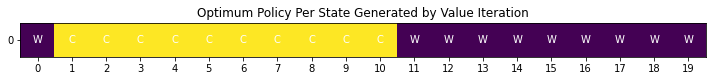

In [ ]:
heat_map(vi_opt_policy, 20, 1,  "Optimum Policy Per State Generated by Value Iteration" ,move_dict= move_dict)

In [ ]:
#Value function of optimal Policy
vi_opt_value = np.reshape(vi_forest_small_optimal.V, (20,1))

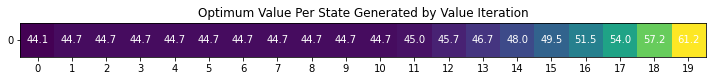

In [ ]:
heat_map(vi_opt_value, 20, 1, "Optimum Value Per State Generated by Value Iteration")

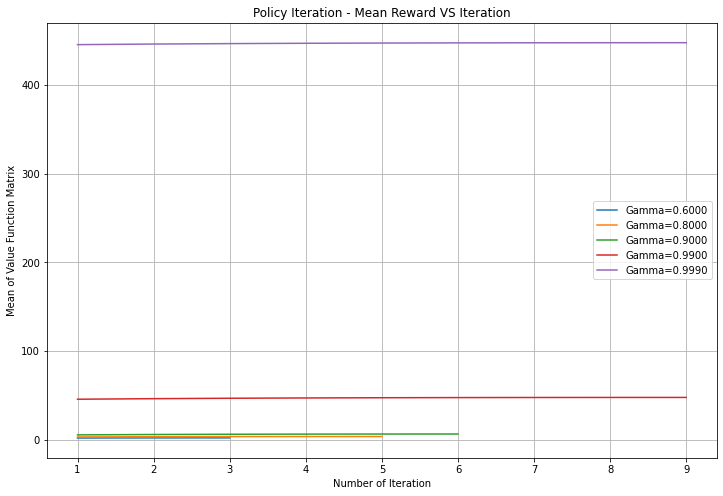

In [ ]:
#Policy Iteration

figure(figsize=(12,8))
plt.grid()
Gamma = [0.6, 0.8, 0.9, 0.99, 0.999]


for g in Gamma:
  pi_forest_small = hiive.mdptoolbox.mdp.PolicyIteration(P_small, R_small, gamma= g)
  pi_forest_small.run()
  df_pi = pd.DataFrame(pi_forest_small.run_stats)
  plt.plot(df_pi['Iteration'], df_pi['Mean V'], label= 'Gamma={:.4f}'.format(g))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Policy Iteration - Mean Reward VS Iteration')
plt.show()

In [ ]:
#Optimal Policy Iteration
pi_forest_small_optimal = hiive.mdptoolbox.mdp.PolicyIteration(P_small, R_small, gamma= 0.99)
pi_forest_small_optimal.run()

[{'Action': None,
  'Error': 12.54790521978024,
  'Iteration': 1,
  'Max V': 61.30236950549435,
  'Mean V': 45.55395776098883,
  'Reward': 61.30236950549435,
  'State': None,
  'Time': 0.006522178649902344,
  'V[0]': 44.19642857142839},
 {'Action': None,
  'Error': 9.379905219780213,
  'Iteration': 2,
  'Max V': 61.30236950549434,
  'Mean V': 46.18135302197786,
  'Reward': 61.30236950549434,
  'State': None,
  'Time': 0.007514476776123047,
  'V[0]': 44.19642857142841},
 {'Action': None,
  'Error': 6.87084921978024,
  'Iteration': 3,
  'Max V': 61.30236950549429,
  'Mean V': 46.65034828296682,
  'Reward': 61.30236950549429,
  'State': None,
  'Time': 0.008257865905761719,
  'V[0]': 44.19642857142834},
 {'Action': None,
  'Error': 4.883676867780238,
  'Iteration': 4,
  'Max V': 61.30236950549426,
  'Mean V': 46.99389074395579,
  'Reward': 61.30236950549426,
  'State': None,
  'Time': 0.008966684341430664,
  'V[0]': 44.19642857142831},
 {'Action': None,
  'Error': 3.3098363649962366,
  'I

In [ ]:
#Optimal Policy
pi_opt_policy = np.reshape(pi_forest_small_optimal.policy, (20,1))

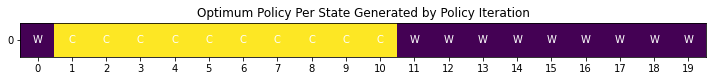

In [ ]:
heat_map(pi_opt_policy, 20, 1, "Optimum Policy Per State Generated by Policy Iteration" ,move_dict= move_dict)

In [ ]:
#Value function of optimal Policy
pi_opt_value = np.reshape(pi_forest_small_optimal.V, (20,1))

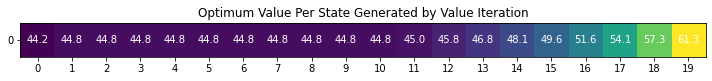

In [ ]:
heat_map(pi_opt_value, 20, 1, "Optimum Value Per State Generated by Value Iteration")

In [ ]:
# Checking If Policies generated by VI and PI are same
vi_forest_small_optimal.policy == pi_forest_small_optimal.policy

True

In [ ]:
res = tuple(map(lambda i, j: i - j, vi_forest_small_optimal.policy,pi_forest_small_optimal.policy)) 
#Finding the states which policy differs 

non_zero_index = np.nonzero(res)[0]

print(f'States which policy is differ {non_zero_index}')

States which policy is differ []


In [ ]:
different_policy = np.reshape(res, (20,1))

In [ ]:
diff_move = {0: 'S', -1: 'D'}

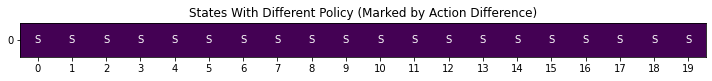

In [ ]:
heat_map(different_policy, 20, 1, 'States With Different Policy (Marked by Action Difference)', move_dict= diff_move)

In [ ]:
df_vi_optim_small = pd.DataFrame(vi_forest_small_optimal.run_stats)
df_pi_optim_small = pd.DataFrame(pi_forest_small_optimal.run_stats)

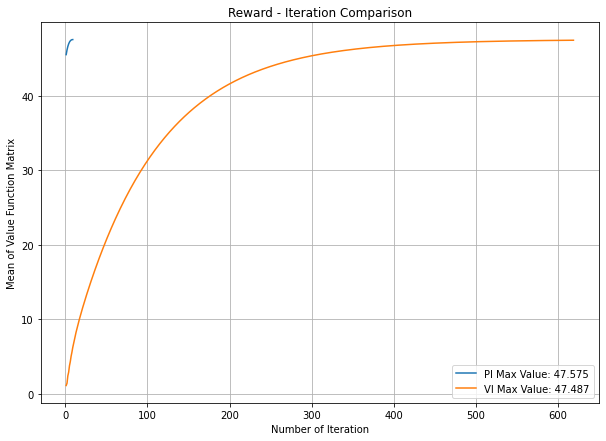

In [ ]:
figure(figsize=(10,7))
plt.grid()

plt.plot(df_pi_optim_small['Iteration'], df_pi_optim_small['Mean V'], label ='PI Max Value: {:0.3f}'.format(df_pi_optim_small['Mean V'].max()))
plt.plot(df_vi_optim_small['Iteration'], df_vi_optim_small['Mean V'], label ='VI Max Value: {:0.3f}'.format(df_vi_optim_small['Mean V'].max()))
plt.legend(loc='best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Reward - Iteration Comparison')
plt.show()

In [ ]:
ql = hiive.mdptoolbox.mdp.QLearning(P_small, R_small, 0.99)
ql.run()

[{'Action': 0,
  'Alpha': 0.1,
  'Epsilon': 1.0,
  'Error': 0.0,
  'Gamma': 0.99,
  'Iteration': 1,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Reward': 0.0,
  'State': 6,
  'Time': 0.000316619873046875,
  'V[0]': 0.0},
 {'Action': 1,
  'Alpha': 0.099,
  'Epsilon': 0.99,
  'Error': 0.099,
  'Gamma': 0.99,
  'Iteration': 2,
  'Max V': 0.099,
  'Mean V': 0.00495,
  'Reward': 1.0,
  'State': 7,
  'Time': 0.0006208419799804688,
  'V[0]': 0.0},
 {'Action': 1,
  'Alpha': 0.09801,
  'Epsilon': 0.9801,
  'Error': 0.0,
  'Gamma': 0.99,
  'Iteration': 3,
  'Max V': 0.099,
  'Mean V': 0.00495,
  'Reward': 0.0,
  'State': 0,
  'Time': 0.000949859619140625,
  'V[0]': 0.0},
 {'Action': 0,
  'Alpha': 0.0970299,
  'Epsilon': 0.9702989999999999,
  'Error': 0.0,
  'Gamma': 0.99,
  'Iteration': 4,
  'Max V': 0.099,
  'Mean V': 0.00495,
  'Reward': 0.0,
  'State': 0,
  'Time': 0.0010862350463867188,
  'V[0]': 0.0},
 {'Action': 0,
  'Alpha': 0.096059601,
  'Epsilon': 0.96059601,
  'Error': 0.0,
  'Gamma': 0.99,
  

In [ ]:
df_q = pd.DataFrame(ql.run_stats)

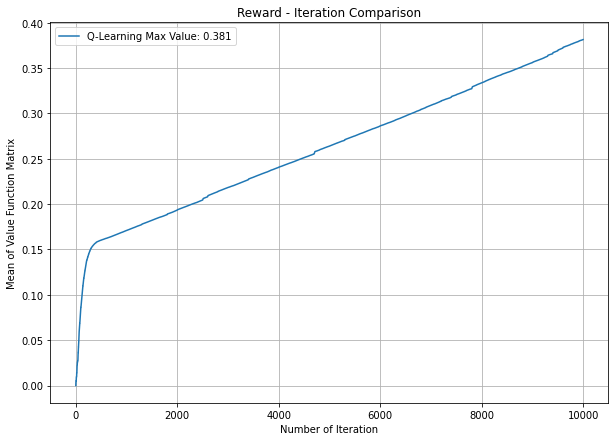

In [ ]:
figure(figsize=(10,7))
plt.grid()

plt.plot(df_q['Iteration'], df_q['Mean V'], label ='Q-Learning Max Value: {:0.3f}'.format(df_q['Mean V'].max()))

plt.legend(loc='best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Reward - Iteration Comparison')
plt.show()

In [ ]:
ql_naive_policy = np.reshape(ql.policy, (20,1))

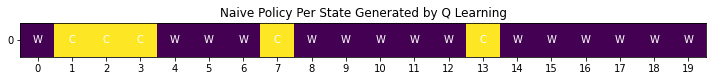

In [ ]:
heat_map(ql_naive_policy, 20, 1, "Naive Policy Per State Generated by Q Learning" ,move_dict= move_dict)

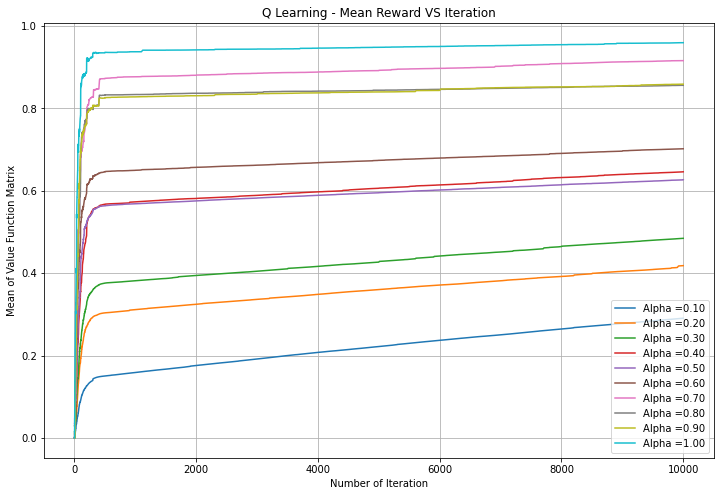

In [ ]:
# Looks like by Increasing Number of Iteration we can achieve higher score
figure(figsize=(12,8))
plt.grid()
alpha_list = list(np.arange(0.1, 1.1, 0.1))


for a in alpha_list:
  ql_forest_small = hiive.mdptoolbox.mdp.QLearning(P_small, R_small, 0.9, alpha= a)
  ql_forest_small.run()
  df_ql_a = pd.DataFrame(ql_forest_small.run_stats)
  plt.plot(df_ql_a['Iteration'], df_ql_a['Mean V'], label= 'Alpha ={:.2f}'.format(a))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

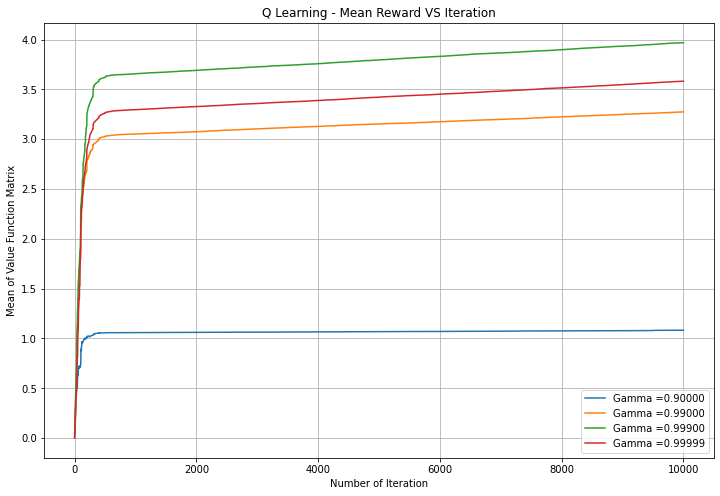

In [ ]:
# Looks like by Increasing Number of Iteration we can achieve higher score
figure(figsize=(12,8))
plt.grid()
gamma_list = [0.9, 0.99, 0.999, 0.99999]


for g in gamma_list:
  ql_forest_small = hiive.mdptoolbox.mdp.QLearning(P_small, R_small, g, alpha= 1)
  ql_forest_small.run()
  df_ql_g = pd.DataFrame(ql_forest_small.run_stats)
  plt.plot(df_ql_g['Iteration'], df_ql_g['Mean V'], label= 'Gamma ={:.5f}'.format(g))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

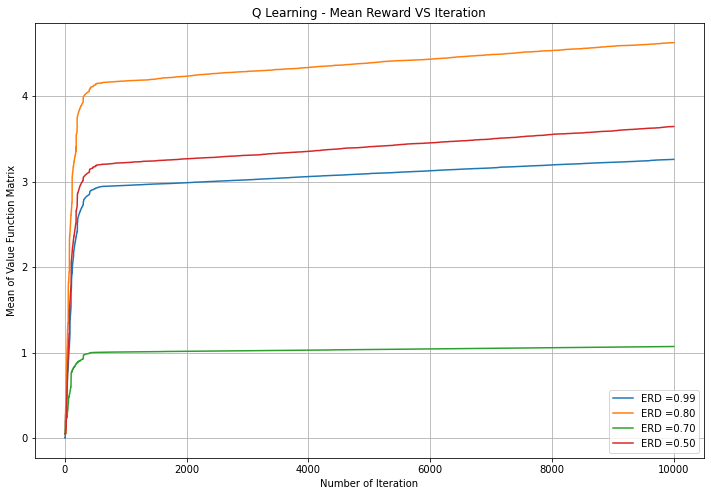

In [ ]:
# Looks like by Increasing Number of Iteration we can achieve higher score
figure(figsize=(12,8))
plt.grid()
epsilon_decay_list = [0.99, 0.8, 0.7, 0.5]


for ed in epsilon_decay_list:
  ql_forest_small = hiive.mdptoolbox.mdp.QLearning(P_small, R_small, 0.999, alpha= 1, epsilon_decay=ed)
  ql_forest_small.run()
  df_ql_erd = pd.DataFrame(ql_forest_small.run_stats)
  plt.plot(df_ql_erd['Iteration'], df_ql_erd['Mean V'], label= 'ERD ={:.2f}'.format(ed))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

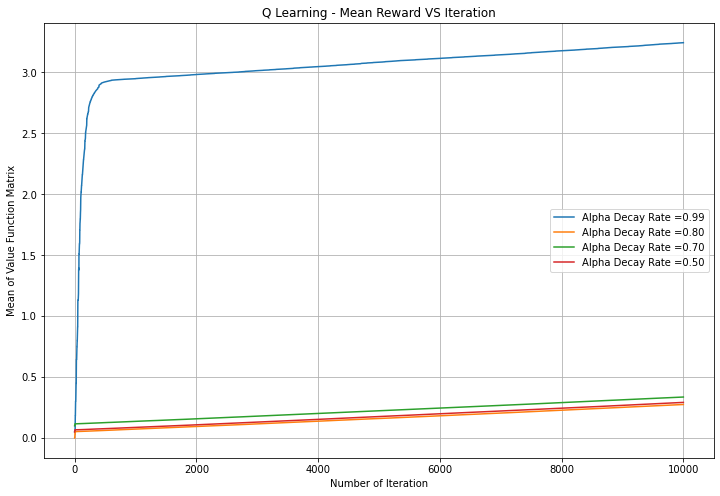

In [ ]:
# Looks like by Increasing Number of Iteration we can achieve higher score
figure(figsize=(12,8))
plt.grid()
alpha_decay_list = [0.99, 0.8, 0.7, 0.5]


for ad in alpha_decay_list:
  ql_forest_small = hiive.mdptoolbox.mdp.QLearning(P_small, R_small, 0.999, alpha= 1, alpha_decay = ad)
  ql_forest_small.run()
  df_ql_ad = pd.DataFrame(ql_forest_small.run_stats)
  plt.plot(df_ql_ad['Iteration'], df_ql_ad['Mean V'], label= 'Alpha Decay Rate ={:.2f}'.format(ad))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

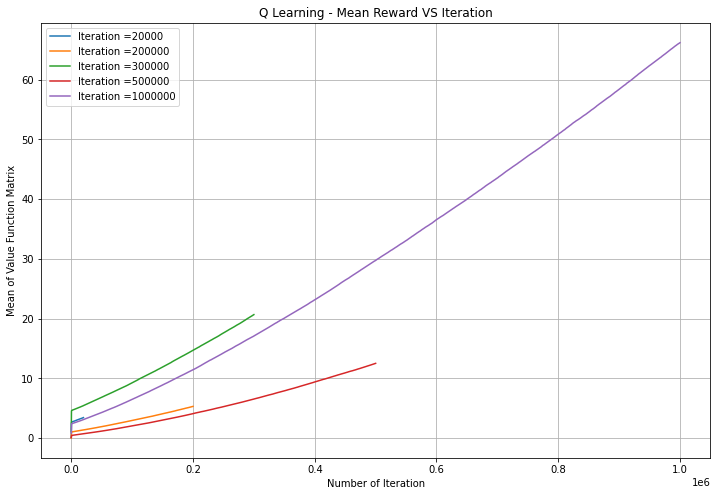

In [ ]:
# Looks like by Increasing Number of Iteration we can achieve higher score
figure(figsize=(12,8))
plt.grid()
iteration_list = [20000, 200000, 300000, 500000, 1000000]


for iter in iteration_list:
  ql_forest_small = hiive.mdptoolbox.mdp.QLearning(P_small, R_small, 0.999, n_iter= iter, alpha=1, alpha_decay=0.99, epsilon_decay= 0.8)
  ql_forest_small.run()
  df_ql_iter = pd.DataFrame(ql_forest_small.run_stats)
  plt.plot(df_ql_iter['Iteration'], df_ql_iter['Mean V'], label= 'Iteration ={}'.format(iter))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

In [ ]:
ql_forest_small_optim = hiive.mdptoolbox.mdp.QLearning(P_small, R_small, 0.999, n_iter= 1000000, alpha=1, alpha_decay=0.99, epsilon_decay= 0.8)
ql_forest_small_optim.run()

[{'Action': 0,
  'Alpha': 0.36972963764972655,
  'Epsilon': 0.1,
  'Error': 7.062392708475501,
  'Gamma': 0.999,
  'Iteration': 100,
  'Max V': 19.73921184136977,
  'Mean V': 2.346111533987578,
  'Reward': 0.0,
  'State': 11,
  'Time': 0.0116119384765625,
  'V[0]': 19.120626129906295},
 {'Action': 1,
  'Alpha': 0.13533300490703207,
  'Epsilon': 0.1,
  'Error': 3.4255913202609767,
  'Gamma': 0.999,
  'Iteration': 200,
  'Max V': 24.80859957121018,
  'Mean V': 3.165965216563486,
  'Reward': 1.0,
  'State': 5,
  'Time': 0.01588606834411621,
  'V[0]': 24.33664921194718},
 {'Action': 1,
  'Alpha': 0.04953625663766238,
  'Epsilon': 0.1,
  'Error': 0.02377104628878549,
  'Gamma': 0.999,
  'Iteration': 300,
  'Max V': 26.533285685922383,
  'Mean V': 3.4071698632495617,
  'Reward': 1.0,
  'State': 1,
  'Time': 0.01997208595275879,
  'V[0]': 26.015401713174157},
 {'Action': 0,
  'Alpha': 0.018131871994995084,
  'Epsilon': 0.1,
  'Error': 0.001805153244534072,
  'Gamma': 0.999,
  'Iteration': 400

In [ ]:
df_ql_optim = pd.DataFrame(ql_forest_small_optim.run_stats)

In [ ]:
df_ql_optim

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,V[0],Max V,Mean V,Iteration
0,11,0,0.0,7.062393,0.011612,0.369730,0.1,0.999,19.120626,19.739212,2.346112,100
1,5,1,1.0,3.425591,0.015886,0.135333,0.1,0.999,24.336649,24.808600,3.165965,200
2,1,1,1.0,0.023771,0.019972,0.049536,0.1,0.999,26.015402,26.533286,3.407170,300
3,2,0,0.0,0.001805,0.023976,0.018132,0.1,0.999,26.520421,27.001690,3.615098,400
4,3,0,0.0,0.176375,0.028030,0.006637,0.1,0.999,26.732496,27.220724,3.650135,500
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,0,0.0,0.073337,50.534389,0.001000,0.1,0.999,174.267853,174.780886,82.134634,999600
9996,6,0,0.0,0.007566,50.538435,0.001000,0.1,0.999,174.280136,174.791550,82.145883,999700
9997,5,0,0.0,0.000614,50.542362,0.001000,0.1,0.999,174.291524,174.803806,82.153949,999800
9998,14,1,1.0,0.127294,50.546538,0.001000,0.1,0.999,174.302447,174.815704,82.165083,999900


In [ ]:
ql_optim_policy = np.reshape(ql_forest_small_optim.policy, (20,1))

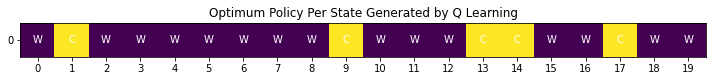

In [ ]:
heat_map(ql_optim_policy, 20, 1, "Optimum Policy Per State Generated by Q Learning" ,move_dict= move_dict)

In [ ]:
ql_opt_value = np.reshape(ql_forest_small_optim.V, (20,1))

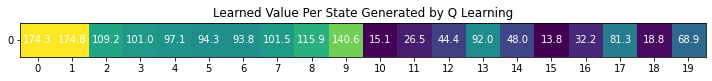

In [ ]:
heat_map(ql_opt_value, 20, 1, "Learned Value Per State Generated by Q Learning")